### Group 12 Project Proposal: 
**Bank Marketing Classification**

Members: Chanpreet Khangura, Darryl Ma, Lilian Mah, and Juliette Sachet


**Introduction**

*Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal:*

Phone-based direct marketing campaigns from a Portuguese banking institution asked clients questions about themselves (ex. age, job, etc.). The survey also included whether or not the client ended up subscribing to the term deposit being advertised (yes or not). The data collected from the marketing campaign included 45211 responses from clients. 

*Clearly state the question you will try to answer with your project:*

Based on age and duration of the phone call, will a given person subscribe to a term deposit or not?

*Identify and describe the dataset that will be used to answer the question:*

We will be using  bank-additional.csv because it contains 4119 rows (compared to the full 41188 rows of the complete dataset). Using this dataset will cause the server to run smoother as well as avoid overplotting.  


**Preliminary Exploratory Data Analysis**

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
data <- read_csv2("https://drive.google.com/u/0/uc?id=1r8z-f85larbfItrABtwmpBeNK_TSDNO1&export=download")
head(data, 10)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  emp.var.rate = col_number(),
  cons.price.idx = col_number(),
  cons.conf.idx = col_number(),
  nr.employed = col_number()
)

See spec(...) for full column specifications.



age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,⋯,2,999,0,nonexistent,-18,92893,-462,1.313,50991,no
39,services,single,high.school,no,no,no,telephone,may,fri,⋯,4,999,0,nonexistent,11,93994,-364,4.855,5191,no
25,services,married,high.school,no,yes,no,telephone,jun,wed,⋯,1,999,0,nonexistent,14,94465,-418,4.962,52281,no
38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,⋯,3,999,0,nonexistent,14,94465,-418,4.959,52281,no
47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,⋯,1,999,0,nonexistent,-1,932,-42,4.191,51958,no
32,services,single,university.degree,no,no,no,cellular,sep,thu,⋯,3,999,2,failure,-11,94199,-375,0.884,49636,no
32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,⋯,4,999,0,nonexistent,-11,94199,-375,0.879,49636,no
41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,⋯,2,999,0,nonexistent,-1,932,-42,4.191,51958,no
31,services,divorced,professional.course,no,no,no,cellular,nov,tue,⋯,1,999,1,failure,-1,932,-42,4.153,51958,no


In [3]:
data <- mutate(data, subscribed = y)
data <- select(data, "age", 'duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed')
#head(data, 10)

In [4]:
bank_split <- initial_split(data, prop = 0.50, strata = subscribed)
bank_train <- training(bank_split)
bank_test <- testing(bank_split)
head(bank_train, 15) #3090x11
# bank_test 1029x11

age,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
39,346,11,93994,-364,4.855,5191,no
47,58,-1,932,-42,4.191,51958,no
32,290,-11,94199,-375,0.879,49636,no
41,44,-1,932,-42,4.191,51958,no
31,68,-1,932,-42,4.153,51958,no
36,148,14,93918,-427,4.968,52281,no
36,97,11,93994,-364,4.859,5191,no
47,211,14,94465,-418,4.958,52281,no
29,553,-18,92893,-462,1.313,50991,no


In [5]:
group_by(bank_train, subscribed) %>% summarize(count=n())

`summarise()` ungrouping output (override with `.groups` argument)



subscribed,count
<chr>,<int>
no,1834
yes,226


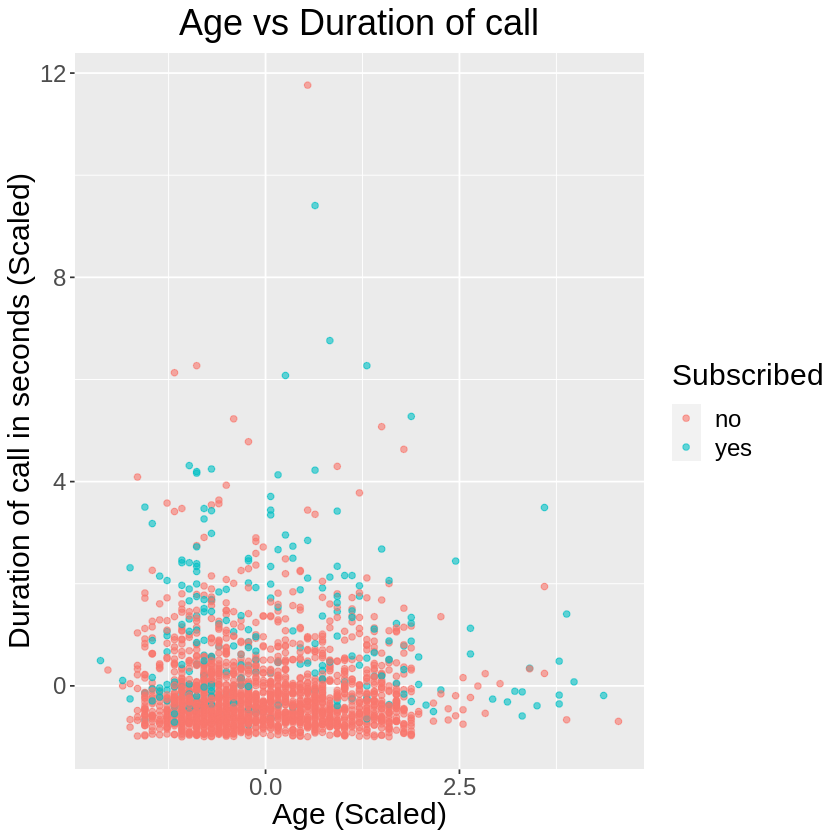

In [6]:
bank_recipe <- recipe(subscribed ~ duration + age , data = bank_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>%
    prep()

scaled_bank <- bake(bank_recipe, bank_train)
ggplot(scaled_bank, aes(x=age, y=duration, color = subscribed)) +
    geom_point(alpha=0.6) + 
    labs(x="Age (Scaled)", y= "Duration of call in seconds (Scaled)", color = "Subscribed") + 
    ggtitle("Age vs Duration of call") + 
    theme(text = element_text(size=18), plot.title = element_text(hjust = 0.5))

**Methods**

*Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?*

We will be using bank_addition.csv and **keeping** the columns listed below. The following  variables will be kept because they are numerical and thus can be used to make a predictive model. We also believe that some of these variables will correlate with the target variables (whether a given person subscribes to a term deposit) and therefore will influence the predictor’s accuracy. 


* `age`: the age of the client
* `duration`: duration of the last phone call, in seconds 
* `emp.var.rate`: employment variation rate
* `cons.price.idx`: consumer price index
* `cons.conf.idx`: consumer confidence index
* `euribor3m`: euribor 3 month rate
* `nr.employed`: number of employees
* `y`: did the client subscribe to a term deposit (categorical labels)

The following columns will be **omitted** when tidying our data. These variables are not numeric and therefore, cannot be used to build our classifier. Furthermore, we believe that some of these variables are unnecessary in that they will have little to no effect on the prediction:

* `contact`: was the client contacted through a cellphone or telephone? 
* `day_of_week`: day of the week the client was last contacted on
* `job`: the job type held (ex. admin, blue-collar, etc.)
* `marital status`: marital status
* `education`: level of education
* `default`: does the client have credit in default?
* `housing`: does the client have a housing loan?
* `loan`: does the client have a personal loan?
* `month`: month the client was contacted during
* `campaigns`: number of times this client was contacted for this campaign
* `poutcome`: outcome of the previous marketing campaign
* `pdays`: number of days since the client was last contacted from a previous call
* `previous`: number of times this client was contacted before this campaign


*Describe at least one way that you will visualize the results:*

We will create a scatterplot where our predictive variable, whether or not a person subscribed to the term deposit (yes or no), will be represented by different coloured points as a function of the two predictive variables. The two predictive variables will be Age on the x-axis and Duration of the call (in seconds) on the y-axis. We picked these as our predictive variables because we believe that age would be a good indicator of a person’s financial stability and therefore, could influence if they subscribe to a term deposit. Duration of the call was also picked as a predictor because we believe that a person who stays in the call longer will more likely be interested and ask questions about a term deposit and therefore, could indicate the likelihood of subscribing. Furthermore, we picked these two variables because they seemed to be the most predictive. All the other numerical variables did not show any clear trends which made it difficult to extract any useful information.

Based on the scatter plot above, we can see that the duration of the call predicts our target variable (whether a given person subscribes to a term deposit). For shorter call durations, most of the points are red (representing “no”) and for longer duration calls, most of the points are blue (signifying “yes”). On the other hand, our second predictive variable (age) does not seem to predict the target variable very well. We still chose to include age as a predictive variable because it was the most predictive variable (other than duration) we could find out of all the other numeric variables we graphed. 


**Expected Outcomes and Significance:**

*What do you expect to find?*

We expect to find that duration of the call will have a positive influence on the accuracy of the model. We also expect to find that age will not be an effective predictor for our target variable. 

*What impact could such findings have?*

Our findings could be useful for advertising purposes, where companies could develop strategies to lengthen phone calls in order to increase the chances of clients subscribing to a term deposit. 

*What future questions could this lead to?*

Are there better variables/data we can collect from the caller that might have a positive influence on the likelihood that someone subscribes to a term deposit? For example, the income of the person being called.
Why do these variables influence whether or not someone subscribes to a term deposit in the first place? 

